# ANOVA Test
ANOVA (or ANalysis Of VAriance) is a technique meant to compare the means of three or more independent samples. 

**Example:** Conducting a test on an e-commerce website and trying out multiple UI designs at once to see if there is a change in sales.

The hypotheses of interest in an ANOVA are as follows:

$$H0: μ1 = μ2 = μ3 ... = μk$$
$$H1:  \text{Means are not all equal}$$


### Test assumptions
The ANOVA test has **important assumptions that must be satisfied** in order for the associated p-value to be valid.
   1. The samples are independent ( samples that are selected randomly so that its observations do not depend on the values other observations).
   2. Each sample is sourced from a **normally distributed population**.
   3. The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

### What happens if assumptions are not true

If these assumptions are not true for a given set of data, it may still be possible to use the **Kruskal-Wallis H-test (scipy.stats.kruskal)** although with some loss of power.

### ANOVA Test vs T-test

The difference between t-test and ANOVA is the former is ued to compare two groups whereas the latter is used to compare three or more groups.




# ANOVA Test example

In [1]:
# We have a bank that gives money with slightly different interests depending on the city. 
# Are credit interests outcomes extracted from the same population?

import pandas as pd

rate = pd.read_csv('data/rate_by_city.csv')
display(rate.head(10))
rate['city_count'] = rate.groupby('City').cumcount()
rate_pivot = rate.pivot(index='city_count', columns='City', values='Rate')
rate_pivot.columns = ['City_'+str(x) for x in rate_pivot.columns.values]

rate_pivot.head()


,Rate,City
0,13.75,1
1,13.75,1
2,13.50,1
3,13.50,1
4,13.00,1
5,13.00,1
6,13.00,1
7,12.75,1
8,12.50,1
9,14.25,2


,City_1,City_2,City_3,City_4,City_5,City_6
city_count,,,,,,
0,13.75,14.25,14.00,15.00,14.50,13.50
1,13.75,13.00,14.00,14.00,14.00,12.25
2,13.50,12.75,13.51,13.75,14.00,12.25
3,13.50,12.50,13.50,13.59,13.90,12.00
4,13.00,12.50,13.50,13.25,13.75,12.00


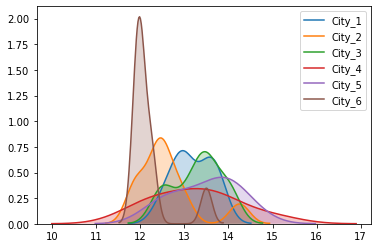

In [22]:
import seaborn as sns

# Plot the data distributions
for name,serie in rate_pivot.iteritems():
    sns.kdeplot(serie,shade=True)

In [27]:
from scipy.stats import f_oneway

analyisVars = [
    rate_pivot.City_1,
    rate_pivot.City_2,
    rate_pivot.City_3,
    rate_pivot.City_4,
    rate_pivot.City_5,
    rate_pivot.City_6
]

result = f_oneway(*analyisVars)
print(result)
## Check the test result
threshold = 0.05
if result.pvalue < threshold:
    print(f"null-hypothesis is rejected pval={result.pvalue}")
else:
    print(f"we cannot reject the null hypotesis. pval={result.pvalue}")

F_onewayResult(statistic=4.8293848737024, pvalue=0.001174551414504048)
null-hypothesis is rejected pval=0.001174551414504048


In [18]:
## EXAMPLE 2 - Same as previous
# In this case, we prefer not to pivot our data since the library will do it for us.
# The pivoting is performed internally by using the C function

import statsmodels.formula.api as smf
import statsmodels.api as sm

# We check by minimizing Ordinary Least Squares
model = smf.ols('Rate ~ C(City)', data=rate).fit()

# Our result is the same p-value and our conclusion to reject remains the same.
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(City),10.945667,5.0,4.829385,0.001175
Residual,21.758133,48.0,NaN,NaN


## Note: Using kdeplot (kernel density estimate) vs normal histogram

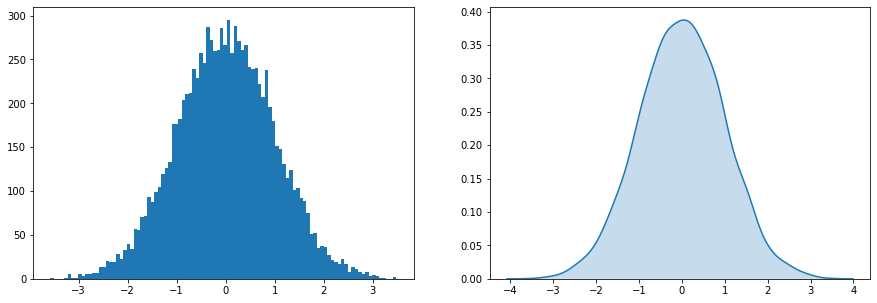

In [29]:
import matplotlib.pyplot as plt
import numpy as np
a = np.random.randn(10000)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(a, bins=100)
plt.subplot(1,2,2)
sns.kdeplot(a,shade=True)